# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Laboratorio 9: Visualizaciones Interactivas

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169

**Curso:** Data Science  
**Sección:** 10  

---

Guatemala, 20 de octubre de 2024


nltk, spacy, textblob

In [40]:
import os
import opendatasets as od
import streamlit as st
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display, clear_output
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud
from nltk import ngrams
from collections import Counter
import seaborn as sns
from matplotlib_venn import venn2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap


In [2]:
def printText(df, stop = 10):
    for i, t in enumerate(df):
        print(i, t)
        if i >= stop:
            break

In [3]:
if not os.path.isdir('nlp-getting-started'):
    od.download("https://www.kaggle.com/c/nlp-getting-started/data")

In [4]:
dataTrain = pd.read_csv('nlp-getting-started/train.csv')
dataTest = pd.read_csv('nlp-getting-started/test.csv')
dataSampleSubmission = pd.read_csv('nlp-getting-started/sample_submission.csv')

In [5]:
text = dataTrain['text']

In [6]:
textWithoutUrl = text.str.replace(r'http\S+|www\S+', '', regex=True)
#printText(textWithoutUrl, 100)

In [7]:
textLowerCase = textWithoutUrl.str.lower()
#textLowerCase.head()

In [8]:

textWithouthSpecialCharacthers = textLowerCase.str.replace('@', '')
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace('#', '')
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace("'", "")

In [9]:
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace(r'\?+', '?', regex=True)
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace(r'\!+', '!', regex=True)
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace('&amp;', 'and')
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace('\n', ' ')
#printText(textWithouthSpecialCharacthers, stop=20)

In [10]:
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace(r'(\.{3,})', 'THREEPOINTSIDENFIFIER', regex=True)
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace(r'(.)\1{'+str(2)+',}', r'\1' * 2, regex=True)
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace('THREEPOINTSIDENFIFIER', '...')
#textWithouthSpecialCharacthers

In [11]:
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace('.',' ')
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace(',',' ')
#printText(textWithouthSpecialCharacthers, 100)

In [12]:
textWithouthSpecialCharacthers = textWithouthSpecialCharacthers.str.replace(r'\s{2,}', ' ', regex=True)
#printText(textWithouthSpecialCharacthers, 100)

In [13]:
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))

def removeStopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopWords]  
    return ' '.join(filtered_words)

textWithoutStopwords = textWithouthSpecialCharacthers.apply(removeStopwords)
#printText(textWithoutStopwords, 100)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lijv1.LINDA_HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
textWithoutStopwords = textWithoutStopwords.str.replace(r'[^\w\s]','',regex=True)

In [15]:
nltk.download('punkt_tab')
tokenizedText = textWithoutStopwords.apply(word_tokenize)
allWords = [word for words in tokenizedText for word in words]
wordCounts = Counter(allWords)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lijv1.LINDA_HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
def mostFrequentWords(tokenizedTextColumn, targetColumn):
    #print("🔄 Analizando palabras más frecuentes por categoría...")
    
    disasterTweets = tokenizedTextColumn[targetColumn == 1]
    nonDisasterTweets = tokenizedTextColumn[targetColumn == 0]
    
    def countWords(texts):
        wordsList = [word for tokens in texts for word in tokens]
        wordCounts = Counter(wordsList)
        return wordCounts
    
    disasterWordCounts = countWords(disasterTweets)
    nonDisasterWordCounts = countWords(nonDisasterTweets)
    disasterWordFreqDf = pd.DataFrame(disasterWordCounts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    nonDisasterWordFreqDf = pd.DataFrame(nonDisasterWordCounts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    
    '''print("📈 Palabra más frecuente en desastres:")
    print(disasterWordFreqDf.head(1))
    
    print("📈 Palabra más frecuente en no desastres:")
    print(nonDisasterWordFreqDf.head(1))'''
    
    return disasterWordFreqDf, nonDisasterWordFreqDf

disasterWordFreqDf, nonDisasterWordFreqDf = mostFrequentWords(tokenizedText, dataTrain['target'])

2024-10-16 22:57:05.495 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-16 22:57:05.761 
  command:

    streamlit run c:\Users\lijv1.LINDA_HP\Documents\GitHub\Lab09_DS\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-16 22:57:05.761 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-16 22:57:05.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-16 22:57:05.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-16 22:57:05.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-16 22:57:05.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-16 22:57

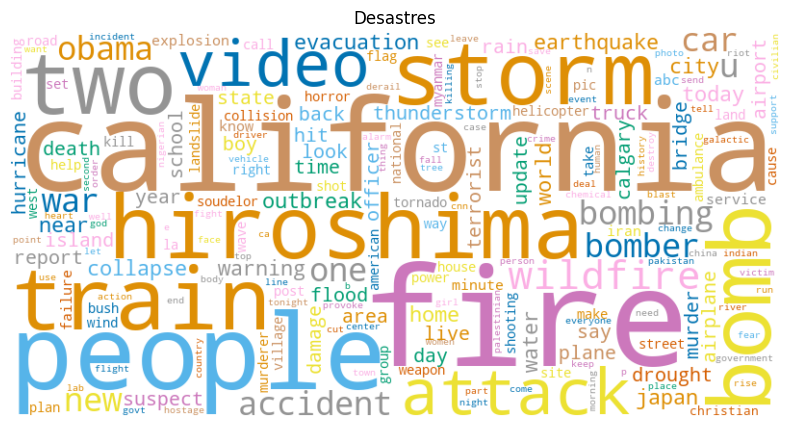

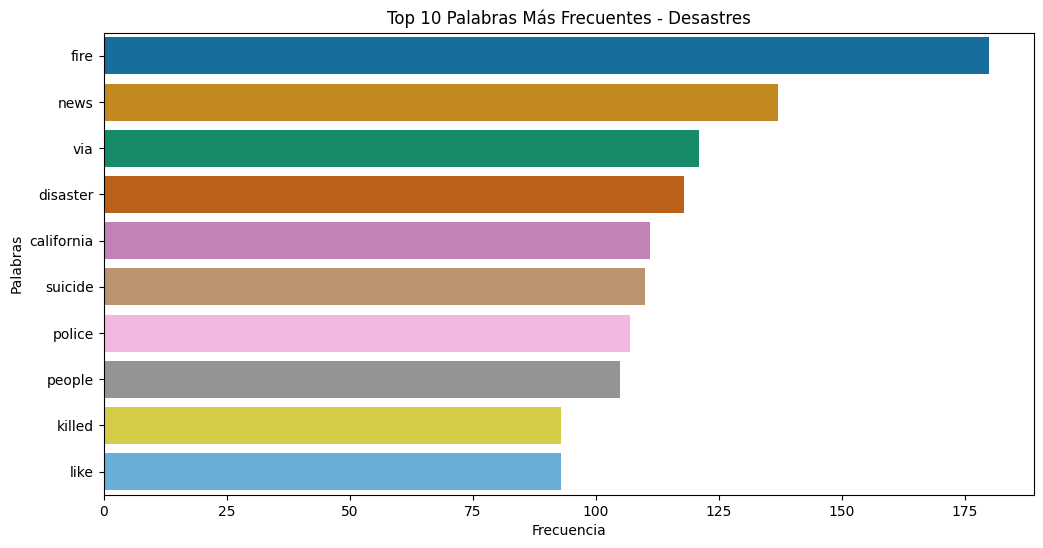

In [41]:
# Función para generar nube de palabras
def plotWordCloud(option):
    if option == 'Desastres':
        title = 'Desastres'
        text = ' '.join(disasterWordFreqDf['Word'])
    else:
        title = 'No Desastres'
        text = ' '.join(nonDisasterWordFreqDf['Word'])
    
    # Usar una paleta apta para daltónicos con seaborn
    palette = sns.color_palette("colorblind", as_cmap=False)
    cmap = ListedColormap(palette.as_hex())
    
    # Crear la nube de palabras con la paleta de colores y un fondo blanco
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
    
    # Mostrar la nube de palabras con Streamlit
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(title)
    st.pyplot(fig)

# Función para generar histograma de palabras más frecuentes
def plotTopWordsHistogram(option):
    if option == 'Desastres':
        title = 'Desastres'
        topWords = disasterWordFreqDf.head(10)
    else:
        title = 'No Desastres'
        topWords = nonDisasterWordFreqDf.head(10)
    
    # Crear el histograma
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=topWords, palette='colorblind', ax=ax)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Palabras')
    ax.set_title(f'Top 10 Palabras Más Frecuentes - {title}')
    ax.legend().remove()
    st.pyplot(fig)

# Interfaz en Streamlit
st.title('Visualización de Nubes de Palabras y Histogramas')

# Seleccionar entre "Desastres" y "No Desastres"
option = st.selectbox('Seleccionar categoría:', ['Desastres', 'No Desastres'])

# Generar nube de palabras
st.header('Nube de Palabras')
plotWordCloud(option)

# Generar histograma de palabras más frecuentes
st.header('Histograma de Palabras Más Frecuentes')
plotTopWordsHistogram(option)

In [18]:
'''interactive_plot2 = widgets.interactive(plotTopWordsHistogram, option=dropdown)
output2 = interactive_plot2.children[-1]
output2.layout.height = '600px'
interactive_plot2'''

interactive(children=(Dropdown(description='Seleccionar:', options=('Desastres', 'No Desastres'), value='Desas…

#### 📊 Histogramas con las palabras más repetidas

In [19]:
'''

plotTopWordsHistogram(disasterWordFreqDf, 'Desastres')
plotTopWordsHistogram(nonDisasterWordFreqDf, 'No Desastres')'''


"\n\nplotTopWordsHistogram(disasterWordFreqDf, 'Desastres')\nplotTopWordsHistogram(nonDisasterWordFreqDf, 'No Desastres')"

In [20]:
'''from matplotlib_venn import venn2
import seaborn as sns
from matplotlib.colors import ListedColormap

def commonWords(disasterWordFreqDf, nonDisasterWordFreqDf):
    print("🔍 Identificando palabras comunes en ambas categorías...")
    disasterWords = set(disasterWordFreqDf['Word'])
    nonDisasterWords = set(nonDisasterWordFreqDf['Word'])
    commonWords = disasterWords.intersection(nonDisasterWords)
    print("📚 Palabras comunes en ambas categorías:")
    print(commonWords)
    
    # Usar una paleta colorblind
    palette = sns.color_palette("colorblind", 2)
    
    plt.figure(figsize=(10, 7))
    
    # Definir los colores del diagrama de Venn
    venn = venn2([disasterWords, nonDisasterWords], ('Desastres', 'No Desastres'))
    venn.get_label_by_id('10').set_color(palette[0])
    venn.get_label_by_id('01').set_color(palette[1])
    
    plt.title('Palabras Comunes entre Desastres y No Desastres')
    plt.show()

commonWords(disasterWordFreqDf, nonDisasterWordFreqDf)'''


'from matplotlib_venn import venn2\nimport seaborn as sns\nfrom matplotlib.colors import ListedColormap\n\ndef commonWords(disasterWordFreqDf, nonDisasterWordFreqDf):\n    print("🔍 Identificando palabras comunes en ambas categorías...")\n    disasterWords = set(disasterWordFreqDf[\'Word\'])\n    nonDisasterWords = set(nonDisasterWordFreqDf[\'Word\'])\n    commonWords = disasterWords.intersection(nonDisasterWords)\n    print("📚 Palabras comunes en ambas categorías:")\n    print(commonWords)\n    \n    # Usar una paleta colorblind\n    palette = sns.color_palette("colorblind", 2)\n    \n    plt.figure(figsize=(10, 7))\n    \n    # Definir los colores del diagrama de Venn\n    venn = venn2([disasterWords, nonDisasterWords], (\'Desastres\', \'No Desastres\'))\n    venn.get_label_by_id(\'10\').set_color(palette[0])\n    venn.get_label_by_id(\'01\').set_color(palette[1])\n    \n    plt.title(\'Palabras Comunes entre Desastres y No Desastres\')\n    plt.show()\n\ncommonWords(disasterWordFreqD

### 🧠 Inciso 6. Modelos

#### 🗂️ Dividir en entrenamiento y prueba (80 - 20).

In [21]:
'''sentences = textWithoutStopwords.tolist()
targets = dataTrain['target'].tolist()
testSentences= dataTest['text'].tolist()

trainingSize = int(len(sentences) * 0.80)
trainingSentences = sentences[0:trainingSize]
testingSentences = sentences[trainingSize:]
trainingTargets = targets[0:trainingSize]
testingTargets = targets[trainingSize:]

trainingTargetsArray = np.array(trainingTargets)
testingTargetsArray = np.array(testingTargets)

print(trainingTargetsArray)
print(testingTargetsArray)'''

"sentences = textWithoutStopwords.tolist()\ntargets = dataTrain['target'].tolist()\ntestSentences= dataTest['text'].tolist()\n\ntrainingSize = int(len(sentences) * 0.80)\ntrainingSentences = sentences[0:trainingSize]\ntestingSentences = sentences[trainingSize:]\ntrainingTargets = targets[0:trainingSize]\ntestingTargets = targets[trainingSize:]\n\ntrainingTargetsArray = np.array(trainingTargets)\ntestingTargetsArray = np.array(testingTargets)\n\nprint(trainingTargetsArray)\nprint(testingTargetsArray)"

#### 🖼️ Tokenización y aplicación de padding.

In [22]:
'''tokenizer = Tokenizer(num_words = 500, oov_token='<OOV>')
tokenizer.fit_on_texts(trainingSentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(trainingSentences)
training_padded = pad_sequences(training_sequences, maxlen=40, padding='post', truncating='post')
testing_sequences = tokenizer.texts_to_sequences(testingSentences)
testing_padded = pad_sequences(testing_sequences, maxlen=40, padding='post', truncating='post')
main_test_sequence=tokenizer.texts_to_sequences(testSentences)
main_test_padded=pad_sequences(main_test_sequence,maxlen=40,padding='post',truncating='post')'''

"tokenizer = Tokenizer(num_words = 500, oov_token='<OOV>')\ntokenizer.fit_on_texts(trainingSentences)\nword_index = tokenizer.word_index\ntraining_sequences = tokenizer.texts_to_sequences(trainingSentences)\ntraining_padded = pad_sequences(training_sequences, maxlen=40, padding='post', truncating='post')\ntesting_sequences = tokenizer.texts_to_sequences(testingSentences)\ntesting_padded = pad_sequences(testing_sequences, maxlen=40, padding='post', truncating='post')\nmain_test_sequence=tokenizer.texts_to_sequences(testSentences)\nmain_test_padded=pad_sequences(main_test_sequence,maxlen=40,padding='post',truncating='post')"

In [23]:
'''def add_embedding_noise(embedding, noise_factor=0.1):
    noise = tf.random.normal(shape=tf.shape(embedding), mean=0.0, stddev=noise_factor, dtype=tf.float32)
    return embedding + noise'''

'def add_embedding_noise(embedding, noise_factor=0.1):\n    noise = tf.random.normal(shape=tf.shape(embedding), mean=0.0, stddev=noise_factor, dtype=tf.float32)\n    return embedding + noise'

#### 🧠 LSTM y Embedding

In [24]:
'''firstModel = tf.keras.Sequential([
    layers.Embedding(500, 16, input_length=40),
    layers.Lambda(lambda x: add_embedding_noise(x, noise_factor=0.05)),
    layers.Bidirectional(layers.LSTM(8, return_sequences=True)),
    layers.Bidirectional(layers.LSTM(8)),
    layers.Dense(72, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(36, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


learning_rate = 0.001  
optimizer = Adam(learning_rate=learning_rate)

firstModel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
firstModel.summary()
firstModel.save('models/firstModel.h5')'''

"firstModel = tf.keras.Sequential([\n    layers.Embedding(500, 16, input_length=40),\n    layers.Lambda(lambda x: add_embedding_noise(x, noise_factor=0.05)),\n    layers.Bidirectional(layers.LSTM(8, return_sequences=True)),\n    layers.Bidirectional(layers.LSTM(8)),\n    layers.Dense(72, activation='relu', kernel_regularizer=regularizers.l2(0.001)),\n    layers.Dropout(0.5),\n    layers.BatchNormalization(),\n    layers.Dense(36, activation='relu', kernel_regularizer=regularizers.l2(0.001)),\n    layers.Dropout(0.5),\n    layers.BatchNormalization(),\n    layers.Dense(1, activation='sigmoid')\n])\n\n\nlearning_rate = 0.001  \noptimizer = Adam(learning_rate=learning_rate)\n\nfirstModel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])\nfirstModel.summary()\nfirstModel.save('models/firstModel.h5')"

In [25]:
#earlyStopping=EarlyStopping(min_delta=0.001,patience=10)

In [26]:
'''history=firstModel.fit(
    training_padded,
    trainingTargetsArray,
    epochs=15,
    validation_data=(testing_padded,testingTargetsArray),
    callbacks=[earlyStopping]
)'''

'history=firstModel.fit(\n    training_padded,\n    trainingTargetsArray,\n    epochs=15,\n    validation_data=(testing_padded,testingTargetsArray),\n    callbacks=[earlyStopping]\n)'

In [27]:
'''loss, accuracy = firstModel.evaluate(testing_padded, testingTargetsArray)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")'''

'loss, accuracy = firstModel.evaluate(testing_padded, testingTargetsArray)\nprint(f"Test Loss: {loss:.4f}")\nprint(f"Test Accuracy: {accuracy:.4f}")'

In [28]:
'''plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2) # Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''

"plt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1) # Loss\nplt.plot(history.history['loss'], label='Training Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Training and Validation Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.subplot(1, 2, 2) # Accuracy\nplt.plot(history.history['accuracy'], label='Training Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.title('Training and Validation Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

#### 🧠 CNN

In [29]:
'''secondModel = tf.keras.Sequential([
    layers.Embedding(500, 16, input_length=40),
    layers.Conv1D(128, 5, activation='relu'),
    layers.MaxPooling1D(pool_size=4),
    layers.Conv1D(64, 5, activation='relu'),
    layers.MaxPooling1D(pool_size=4),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
secondModel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
secondModel.summary()
secondModel.save('models/secondModel.h5')'''

"secondModel = tf.keras.Sequential([\n    layers.Embedding(500, 16, input_length=40),\n    layers.Conv1D(128, 5, activation='relu'),\n    layers.MaxPooling1D(pool_size=4),\n    layers.Conv1D(64, 5, activation='relu'),\n    layers.MaxPooling1D(pool_size=4),\n    layers.Flatten(),\n    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),\n    layers.Dropout(0.5),\n    layers.Dense(1, activation='sigmoid')\n])\n\noptimizer = Adam(learning_rate=0.001)\nsecondModel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])\nsecondModel.summary()\nsecondModel.save('models/secondModel.h5')"

In [30]:
#earlyStopping = EarlyStopping(min_delta=0.001, patience=10)

In [31]:
'''history = secondModel.fit(
    training_padded,
    trainingTargetsArray,
    epochs=15,
    validation_data=(testing_padded, testingTargetsArray),
    callbacks=[earlyStopping]
)'''

'history = secondModel.fit(\n    training_padded,\n    trainingTargetsArray,\n    epochs=15,\n    validation_data=(testing_padded, testingTargetsArray),\n    callbacks=[earlyStopping]\n)'

In [32]:
'''loss, accuracy = secondModel.evaluate(testing_padded, testingTargetsArray)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")'''

'loss, accuracy = secondModel.evaluate(testing_padded, testingTargetsArray)\nprint(f"Test Loss: {loss:.4f}")\nprint(f"Test Accuracy: {accuracy:.4f}")'

In [33]:
'''# Visualización de las métricas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2) # Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()'''


"# Visualización de las métricas\nplt.figure(figsize=(12, 6))\nplt.subplot(1, 2, 1) # Loss\nplt.plot(history.history['loss'], label='Training Loss')\nplt.plot(history.history['val_loss'], label='Validation Loss')\nplt.title('Training and Validation Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.subplot(1, 2, 2) # Accuracy\nplt.plot(history.history['accuracy'], label='Training Accuracy')\nplt.plot(history.history['val_accuracy'], label='Validation Accuracy')\nplt.title('Training and Validation Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

#### 🟢 SVM

In [34]:
'''vectorizer = TfidfVectorizer(max_features=500, stop_words='english')
X = vectorizer.fit_transform(sentences)

X_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)'''

"vectorizer = TfidfVectorizer(max_features=500, stop_words='english')\nX = vectorizer.fit_transform(sentences)\n\nX_train, X_test, y_train, y_test = train_test_split(X, targets, test_size=0.2, random_state=42)\n\nsvm_model = SVC(kernel='linear', C=1.0, random_state=42)\nsvm_model.fit(X_train, y_train)"

In [35]:
'''# Predicción y evaluación del modelo
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Reporte de clasificación
print("\nClassification Report:")
print(classification_report(y_test, y_pred))'''

'# Predicción y evaluación del modelo\ny_pred = svm_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Test Accuracy: {accuracy:.4f}")\n\n# Reporte de clasificación\nprint("\nClassification Report:")\nprint(classification_report(y_test, y_pred))'

### Inciso 7. ✅ Clasificación de tweets

In [36]:
'''first_10_tweets = dataTest['text'].head(6).tolist()
first_10_sequences = tokenizer.texts_to_sequences(first_10_tweets)
first_10_padded = pad_sequences(first_10_sequences, maxlen=40, padding='post', truncating='post')
predictions = firstModel.predict(first_10_padded)
predictions2 = secondModel.predict(first_10_padded)
predictions3 = svm_model.predict(vectorizer.transform(first_10_tweets))

print("🔮 Predicciones del primer modelo:\n")
for i, prediction in enumerate(predictions):
    print(f"Tweet: {first_10_tweets[i]}")
    if prediction[0] > 0.5:
        print("Predicción: Este tweet se refiere a un desastre.")
    else:
        print("Predicción: Este tweet NO se refiere a un desastre.")
    print("\n")

print("🔮 Predicciones del segundo modelo:\n")
for i, prediction in enumerate(predictions2):
    print(f"Tweet: {first_10_tweets[i]}")
    if prediction[0] > 0.5:
        print("Predicción: Este tweet se refiere a un desastre.")
    else:
        print("Predicción: Este tweet NO se refiere a un desastre.")
    print("\n")

print("🔮 Predicciones del modelo SVM:\n")
for i, prediction in enumerate(predictions3):
    print(f"Tweet: {first_10_tweets[i]}")
    if prediction == 1:
        print("Predicción: Este tweet se refiere a un desastre.")
    else:
        print("Predicción: Este tweet NO se refiere a un desastre.")
    print("\n")'''

'first_10_tweets = dataTest[\'text\'].head(6).tolist()\nfirst_10_sequences = tokenizer.texts_to_sequences(first_10_tweets)\nfirst_10_padded = pad_sequences(first_10_sequences, maxlen=40, padding=\'post\', truncating=\'post\')\npredictions = firstModel.predict(first_10_padded)\npredictions2 = secondModel.predict(first_10_padded)\npredictions3 = svm_model.predict(vectorizer.transform(first_10_tweets))\n\nprint("🔮 Predicciones del primer modelo:\n")\nfor i, prediction in enumerate(predictions):\n    print(f"Tweet: {first_10_tweets[i]}")\n    if prediction[0] > 0.5:\n        print("Predicción: Este tweet se refiere a un desastre.")\n    else:\n        print("Predicción: Este tweet NO se refiere a un desastre.")\n    print("\n")\n\nprint("🔮 Predicciones del segundo modelo:\n")\nfor i, prediction in enumerate(predictions2):\n    print(f"Tweet: {first_10_tweets[i]}")\n    if prediction[0] > 0.5:\n        print("Predicción: Este tweet se refiere a un desastre.")\n    else:\n        print("Pred

In [37]:
'''training_sequences = tokenizer.texts_to_sequences(trainingSentences)
training_padded = pad_sequences(training_sequences, maxlen=40, padding='post', truncating='post')
predictions_train = firstModel.predict(training_padded)
predictions_train = (predictions_train > 0.5).astype(int) 
true_labels_train = np.array(trainingTargets) 
cm_train = confusion_matrix(true_labels_train, predictions_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Desastre', 'Desastre'], yticklabels=['No Desastre', 'Desastre'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Diagrama de Confusión - Conjunto de Entrenamiento Primer Modelo')
plt.show()

training_sequences = tokenizer.texts_to_sequences(trainingSentences)
training_padded = pad_sequences(training_sequences, maxlen=40, padding='post', truncating='post')
predictions_train = secondModel.predict(training_padded)
predictions_train = (predictions_train > 0.5).astype(int) 
true_labels_train = np.array(trainingTargets) 
cm_train = confusion_matrix(true_labels_train, predictions_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Desastre', 'Desastre'], yticklabels=['No Desastre', 'Desastre'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Diagrama de Confusión - Conjunto de Entrenamiento Segundo Modelo')
plt.show()

y_pred = svm_model.predict(X_train)
cm_train_svm = confusion_matrix(y_train, y_pred)

# Graficamos la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Desastre', 'Desastre'], yticklabels=['No Desastre', 'Desastre'])
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.title('Diagrama de Confusión - Conjunto de Entrenamiento SVM')
plt.show()'''

"training_sequences = tokenizer.texts_to_sequences(trainingSentences)\ntraining_padded = pad_sequences(training_sequences, maxlen=40, padding='post', truncating='post')\npredictions_train = firstModel.predict(training_padded)\npredictions_train = (predictions_train > 0.5).astype(int) \ntrue_labels_train = np.array(trainingTargets) \ncm_train = confusion_matrix(true_labels_train, predictions_train)\nplt.figure(figsize=(8, 6))\nsns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['No Desastre', 'Desastre'], yticklabels=['No Desastre', 'Desastre'])\nplt.xlabel('Predicción')\nplt.ylabel('Realidad')\nplt.title('Diagrama de Confusión - Conjunto de Entrenamiento Primer Modelo')\nplt.show()\n\ntraining_sequences = tokenizer.texts_to_sequences(trainingSentences)\ntraining_padded = pad_sequences(training_sequences, maxlen=40, padding='post', truncating='post')\npredictions_train = secondModel.predict(training_padded)\npredictions_train = (predictions_train > 0.5).astype(int) \nt